In [46]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [45]:
def sign(x):
    return (1, -1)[x < 0]

def update_rule(a, w):
    x = np.zeros(len(a))
    for i in range(len(a)):
        for j in range(len(a)):
            x[i] += w[i, j] * a[j]
    x = [sign(a) for a in x]
    return x

In [3]:
# Test convergens patters
def find_attractor(x, w):
    prev = x

    while True:
        curr = update_rule(prev, w)
        if np.array_equal(curr, prev):
            break
        prev = curr
    return prev

In [4]:
def store_patterns():
    data = np.loadtxt('./pict.dat',delimiter=",", dtype=int).reshape(-1,1024)
    return data

In [5]:
def init_weights(patterns):
    dim = patterns.shape[1]
    w=np.zeros((dim,dim))
    
    for i in range(dim):
        for j in range(dim):
            s = 0
            for pattern in patterns:
                s += pattern[i]*pattern[j]
            w[i][j]=(1/(patterns.size)) * s
    #w=0.5*(np.add(w,w.T))
    return w

In [6]:
def recall(pattern,w, patterns):
    dim = pattern.size
    count = 0
    energyLevels = []
    
    previousPattern = np.zeros(dim)
    while True:   
        
        s = np.dot(w,pattern)
        s[s >= 0] = 1
        s[s < 0] = -1
        
        pattern=s
        

        
        count += 1  
        
        #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
        #plt.show()
        
        solved, ind = check_True(pattern, patterns)
        if solved:
            print ("It took:",count,"nr of iterations")
            plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            plt.show()
            return ind
            
        elif np.array_equal(pattern,previousPattern):
            print("Local minimum found in iteration:",count)
            return -1
        previousPattern = np.copy(pattern)

def check_True(predicted_pattern, patterns):
    solved = False
    for i in range(len(patterns)):
        if np.array_equal(patterns[i],predicted_pattern):
            #print("True! It matched pattern nr:",i)
            solved = True
    return solved, i

def recall2(pattern,w, patterns):
    dim = pattern.size
    count = 0
    energyLevels = []
    
    previousPattern = np.zeros(dim)
    while True:
        
        s = np.dot(w,pattern)
        s[s >= 0] = 1
        s[s < 0] = -1
                    
        pattern=s
        
        count += 1  
            
        energyLevels.append(calc_energy(pattern,w))
        
        #print("Energy: ", calc_energy(pattern,w))

        if check_True(pattern, patterns):
            #print ("It took:",count,"nr of iterations")
            #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            #plt.show()
            return pattern
            
        elif np.array_equal(pattern,previousPattern):
            #print("Local minimum found in iteration:",count)
            #plt.imshow(pattern.reshape(32,32),interpolation="nearest")
            #plt.show()
            return False
        
        previousPattern=pattern
        if count ==50:
            return False
        
def calc_energy(pattern, w):
    dim = pattern.size
    energy=0
    
    enrg = np.multiply(w, np.multiply.outer(pattern, pattern.T)).sum()
    
    """for i in range(dim):
        for j in range(dim):
            energy-= w[i][j]*pattern[i]*pattern[j]
    """        
    return -enrg

In [7]:
def flip(pattern, percentage):
    index = np.arange(pattern.size)
    np.random.shuffle(index)
    
    abso = int(percentage*pattern.size)
    flipIndex = index[:abso]
    
    flipped = np.copy(pattern)
    flipped[flipIndex] = -1*flipped[flipIndex]
    
    #plt.imshow(flipped.reshape(32,32),interpolation="nearest")
    #plt.show()
    
    return flipped
    

In [8]:
data = store_patterns()
w = init_weights(data[:5,:])


Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in itera

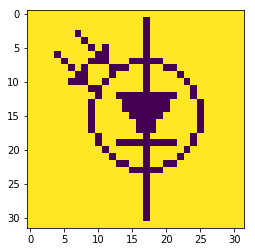

Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 4
Local minimum found in iteration: 3
Local minimum found in iteration: 4
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 2
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in iteration: 3
Local minimum found in itera

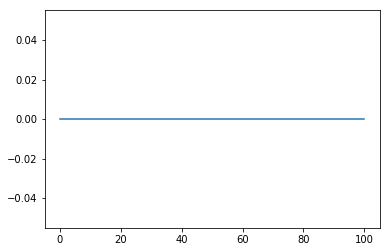

In [9]:
bool_list = []
start_ind = 2
for i in range(0, 101):
    
    x = flip(data[start_ind],i/100)
    ind = recall(x, w, data)
    if ind == start_ind:
        bool_list.append(True)
    else:
        bool_list.append(False)

plt.plot(range(0,101), bool_list)

In [10]:
def random_patterns(num_pic):
    random_imgs = []
    binar = (1, -1)
    for j in range(num_pic):
        vec = np.zeros(1024)
        for i in range(1024):
            rand_int = np.random.randint(0, 2)
            vec[i] = binar[rand_int]
        random_imgs.append(vec)
        
    plt.imshow(random_imgs[0].reshape(32,32),interpolation="nearest")
    plt.show()    
    
    return np.array(random_imgs)
    
    

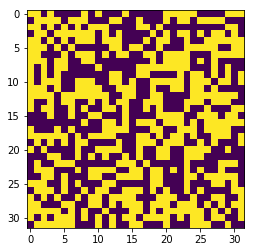

In [11]:
random_imgs = random_patterns(100)
w_random = init_weights(random_imgs)

In [12]:
bool_list = []
start_ind = 1
for i in range(0, 101):
    
    x = flip(random_imgs[start_ind],i/100)
    ind = recall(random_imgs[start_ind], w)
    if ind == start_ind:
        bool_list.append(True)
    else:
        bool_list.append(False)

plt.plot(range(0,101), bool_list)

TypeError: recall() missing 1 required positional argument: 'patterns'

In [ ]:
x = flip(random_imgs[60],20/100)
ind = recall(x, w_random)

#The difference is that it's not possible to store it
#We can store more random patterns than actually 

In [13]:
def init_weights2(patterns):
    dim = patterns.shape[1] #X x N
    n = patterns.shape[0] #N
    w = np.zeros((dim, dim))
    for i in range(n):
        w+= 1/dim*np.multiply.outer(patterns[i], patterns[i])
        
    return w

In [14]:
def check_stable(pattern, w):
    """
        Return True if pattern doesn't change after one iteration
        Return False otherwise
    """
    s = np.dot(w, pattern)
    s[s>=0] = 1
    s[s<0] = -1
    
    if np.array_equal(pattern, s):
        return True
    else:
        return False

In [15]:
def check_distance(v1, v2):
    return np.sum(np.subtract(v1, v2))

In [39]:
def new_init_weights(patterns,distPatterns=np.array(0),zeroDiag=False):
    dim = patterns.shape[1]
    n = patterns.shape[0]
    w=np.zeros((dim,dim))
    
    correctList = []
    correctDistList = []
    
    for i in range(n): 
        w+=1/dim*np.multiply.outer(patterns[i],patterns[i])
        if(zeroDiag):
            np.fill_diagonal(w,0)
        #correctList.append(experiment(w,i,patterns))
        if(distPatterns.size>1):
            correctDistList.append(experiment(w,i,distPatterns))
    return w, correctList, correctDistList

def experiment(w,iterations,patterns,plsReturn=False):
    N = patterns.shape[0] #Nr of patterns 
    outcomeList = []
    
    #Iterate over the amount of patterns that have been inserted to w
    for i in range(iterations+1):
        outcome = checkStable(patterns[i],w)
        outcomeList.append(outcome)

    unique,counts=np.unique(np.array(outcomeList),return_counts=True)
    a = dict(zip(unique, counts))
    #print("***With",iterations+1,"nr of patterns in w-matrix***")
    if True in a:
        #print(a[True],"of patterns remained stable\n")
        #correctList.append(a[True])
        return a[True]
    else:
        #print("none remained stable\n")
        #correctList.append(0)
        return 0
    if(plsReturn):
        return correctList
        
#Checks if pattern changes during one iteration, if not it's stable
def checkStable(pattern,w): 
    s = np.dot(w,pattern)
    s[s >= 0] = 1
    s[s < 0] = -1

    if(np.array_equal(pattern,s)):
        return True
    else:
        return False
        
def genRandVector(dim,withBias=False):
    if not withBias:
        dim = int(dim/2)
        randVector = np.concatenate([np.ones(dim),-1*np.ones(dim)])
    else:
        dim1 = int(dim/3)
        dim2 = int(dim*2/3)
        randVector = np.concatenate([np.ones(dim2),-1*np.ones(dim1)])
        
    np.random.shuffle(randVector)
    #print(randVector)
    return randVector

In [17]:
def init_weights_zeros(patterns):
    dim = patterns.shape[1] #X x N
    n = patterns.shape[0] #N
    w = np.zeros((dim, dim))
    for i in range(n):
        w += 1/dim*np.multiply.outer(patterns[i], patterns[i])
        np.fill_diagonal(w,0)
    
    return w

In [18]:
#Generate patterns and distorted versions of them

patterns = []
nrOfVectors=300
for i in range(nrOfVectors):
    patterns.append(genRandVector(144)) #Gets a 100 unit vector
random_patterns1 = np.array(patterns)

flipped_patterns = []
for pat in patterns:
    flipped_patterns.append(flip(pat,0.02))
flipped_patterns = np.array(flipped_patterns)

In [36]:
w_zeros, correctList0, correctDistList0 = new_init_weights(random_patterns1,flipped_patterns,zeroDiag=True)


In [41]:
biased_patterns = []
nrOfVectors=300
for i in range(nrOfVectors):
    biased_patterns.append(genRandVector(144,True)) #Gets a 100 unit vector
biased_patterns = np.array(biased_patterns)

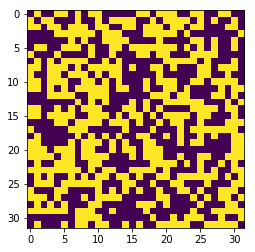

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


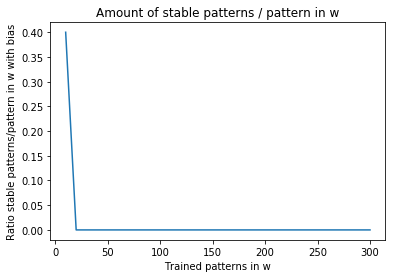

In [43]:
## What happens with the number of stable patterns as more are learned?

random_imgs = random_patterns(300)
num_stable = []
for i in range(0, 301, 10):
    w_large, _, _ = new_init_weights(biased_patterns[:i],zeroDiag=True)
    count = 0
    for j in range(len(biased_patterns)):
        stable = check_stable(biased_patterns[j], w_large)
        if stable:
            count+=1
    num_stable.append(count)

plt.plot(range(0, 301, 10), np.divide(num_stable, range(0, 301, 10)))
plt.title("Amount of stable patterns / pattern in w")
plt.xlabel('Trained patterns in w')
plt.ylabel('Ratio stable patterns/pattern in w with bias')
plt.savefig("capacitybias")
plt.show()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


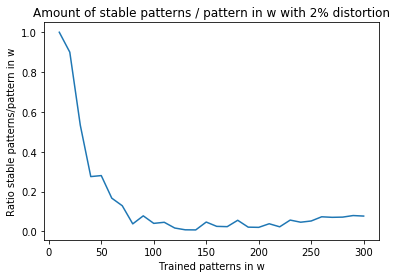

In [29]:
## What happens with the number of stable patterns with noise

#random_imgs = random_patterns(300)
num_stable = []
for i in range(0, 301, 10):
    w_large = init_weights2(flipped_patterns[:i])
    count = 0
    for j in range(len(flipped_patterns)):
        stable = check_stable(flipped_patterns[j], w_large)
        if stable:
            count+=1
    num_stable.append(count)

plt.plot(range(0, 301, 10), np.divide(num_stable, range(0, 301, 10)))
plt.title("Amount of stable patterns / pattern in w with 2% distortion")
plt.xlabel('Trained patterns in w')
plt.ylabel('Ratio stable patterns/pattern in w')
plt.savefig("distortion1")
plt.show()

In [ ]:
x1 = range(1,len(correctDistList)+1)
y1 = np.divide(np.array(correctDistList),x)
plt.plot(x,y)
plt.plot(x1,y1)
plt.title("Amount of stable patterns per pattern in w when patterns are distorted")
plt.show()